# `0` **Import Libraries**

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D, Flatten ,Activation, MaxPooling2D,  Input
from keras.applications.resnet_v2 import ResNet50V2
from keras.callbacks import EarlyStopping
keras.utils.set_random_seed(1234)

# `01` Load & Preprocess CIFAR 10 Dataset

In [91]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [92]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

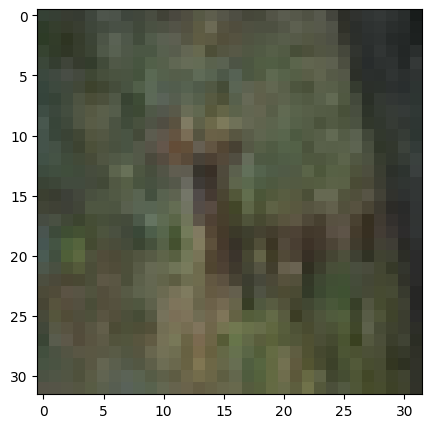

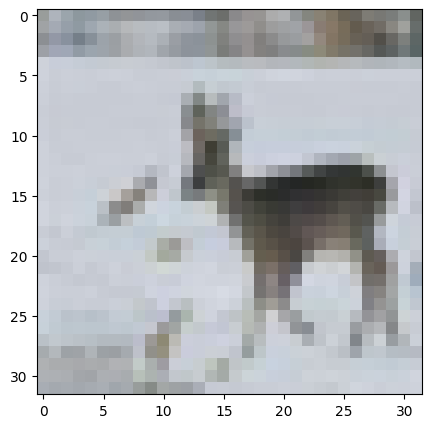

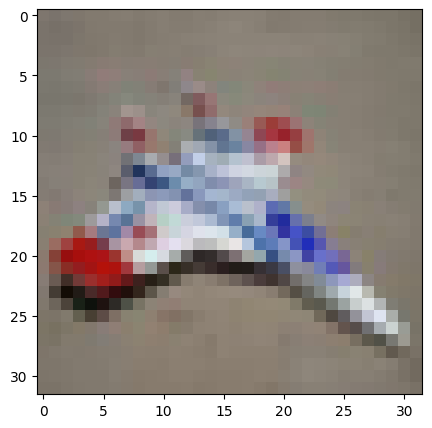

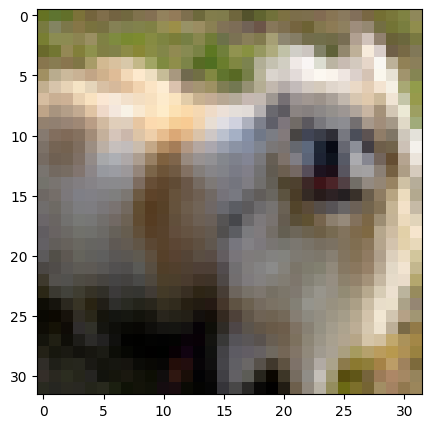

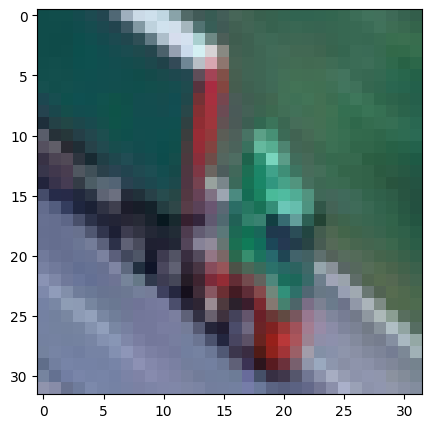

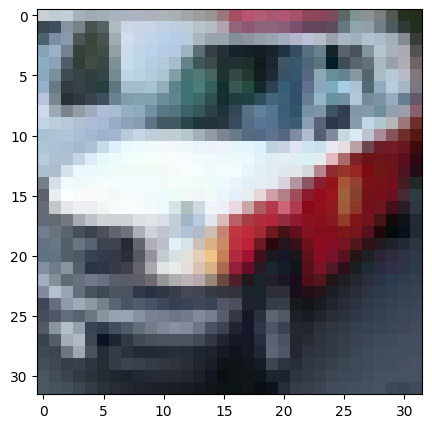

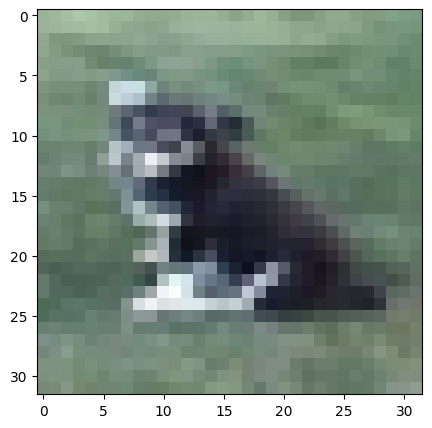

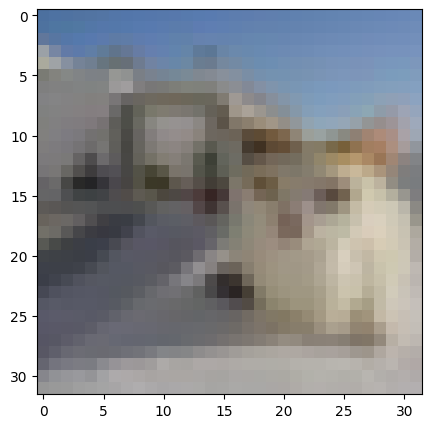

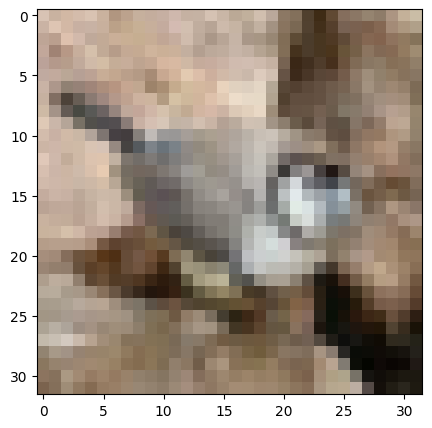

In [93]:
sample= range (10,100,10)
for i in sample:
  plt.figure(figsize=(5,5))
  plt.imshow(X_train[i])
  plt.show()

### Feature Rescaling

In [95]:
# Rescale Input
X_train = X_train / 255.
X_test  =X_test / 255.

### OneHotEncode Target Variable

In [96]:
y_train =  keras.utils.to_categorical(y_train)
y_test  =  keras.utils.to_categorical(y_test)

## Set Global Parameters

In [ ]:
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS = 150
early_stop=EarlyStopping(monitor='val_accuracy',patience=10,restore_best_weights=True)

## `i` Trial no. 1

### Model Training

In [98]:
model1 = Sequential()
model1.add(Input(shape=X_train.shape[1:]))
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 404,010 (1.54 MB)

 Trainable params: 404,010 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [100]:
history1=model1.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2264 - loss: 2.0837 - val_accuracy: 0.3491 - val_loss: 1.8233
Epoch 2/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3607 - loss: 1.7800 - val_accuracy: 0.3818 - val_loss: 1.7243
Epoch 3/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3974 - loss: 1.6934 - val_accuracy: 0.3991 - val_loss: 1.6758
Epoch 4/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4148 - loss: 1.6378 - val_accuracy: 0.4174 - val_loss: 1.6396
Epoch 5/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4331 - loss: 1.5877 - val_accuracy: 0.4227 - val_loss: 1.6229
Epoch 6/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4431 - loss: 1.5525 - val_accuracy: 0.4352 - val_loss: 1.5983
Epoch 7/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4580 - loss: 1.5217 - val_accuracy: 0.4358 - val_loss: 1.5828
Epoch 8/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4688 - loss: 1.4944 - val_accu

### Model Evaluation

In [101]:
loss, accuracy =model1.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4791 - loss: 1.5017
Loss: 1.5049664974212646
Accuracy: 0.48179998993873596


### Result Visualization

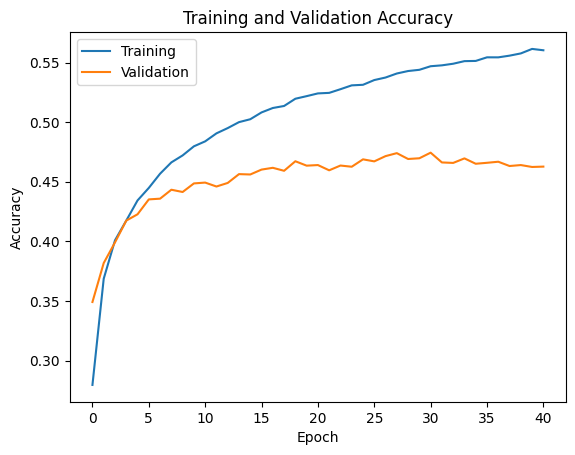

In [102]:
plt.plot(history1.history['accuracy'], label='Training')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

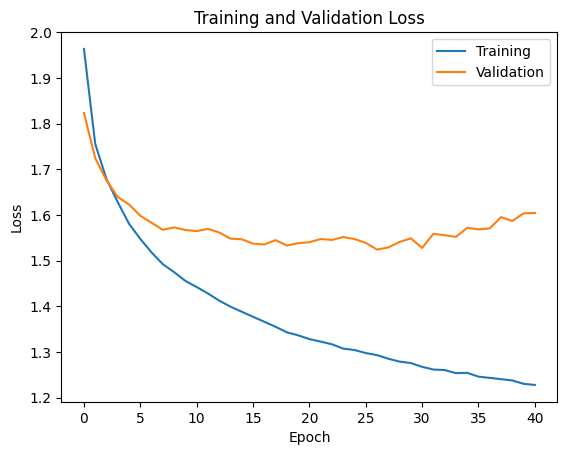

In [103]:
plt.plot(history1.history['loss'], label='Training')
plt.plot(history1.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `ii` Trial no. 2

### Model Training

In [104]:
model2 = Sequential()
model2.add(Input(shape=X_train.shape[1:]))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,748,266 (6.67 MB)

 Trainable params: 1,748,266 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
history2=model2.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2109 - loss: 2.1196 - val_accuracy: 0.3445 - val_loss: 1.8202
Epoch 2/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3518 - loss: 1.7860 - val_accuracy: 0.3709 - val_loss: 1.7370
Epoch 3/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3879 - loss: 1.6879 - val_accuracy: 0.3956 - val_loss: 1.6687
Epoch 4/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4162 - loss: 1.6229 - val_accuracy: 0.4183 - val_loss: 1.6187
Epoch 5/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4392 - loss: 1.5593 - val_accuracy: 0.4204 - val_loss: 1.6221
Epoch 6/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4606 - loss: 1.5127 - val_accuracy: 0.4394 - val_loss: 1.5767
Epoch 7/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4734 - loss: 1.4790 - val_accuracy: 0.4406 - val_loss: 1.5573
Epoch 8/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4796 - loss: 1.4567 - val_accu

### Model Evaluation

In [107]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4839 - loss: 1.5190
Loss: 1.5315148830413818
Accuracy: 0.48019999265670776


### Result Visualization

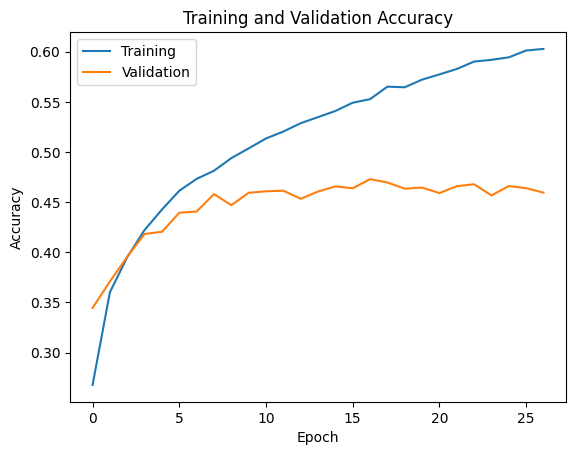

In [108]:
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


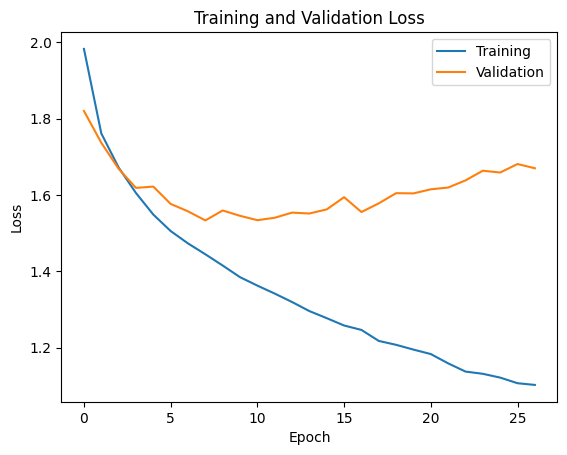

In [109]:
plt.plot(history2.history['loss'], label='Training')
plt.plot(history2.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## `i` Trial no. 3

### Model Training

In [110]:
model3= Sequential()
model3.add(Input(shape=X_train.shape[1:]))
model3.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 552,714 (2.11 MB)

 Trainable params: 552,714 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
history3=model3.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3599 - loss: 1.7456 - val_accuracy: 0.5580 - val_loss: 1.2555
Epoch 2/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5749 - loss: 1.1858 - val_accuracy: 0.6157 - val_loss: 1.0933
Epoch 3/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6491 - loss: 0.9904 - val_accuracy: 0.6509 - val_loss: 1.0013
Epoch 4/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6941 - loss: 0.8736 - val_accuracy: 0.6684 - val_loss: 0.9515
Epoch 5/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7236 - loss: 0.7884 - val_accuracy: 0.6818 - val_loss: 0.9197
Epoch 6/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7517 - loss: 0.7176 - val_accuracy: 0.6723 - val_loss: 0.9649
Epoch 7/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7703 - loss: 0.6570 - val_accuracy: 0.6707 - val_loss: 0.9948
Epoch 8/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7897 - loss: 0.5973 - val_accu

### Model Evaluation

In [113]:
loss, accuracy = model3.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6862 - loss: 0.9932
Loss: 1.00142502784729
Accuracy: 0.680400013923645


### Result Visualization

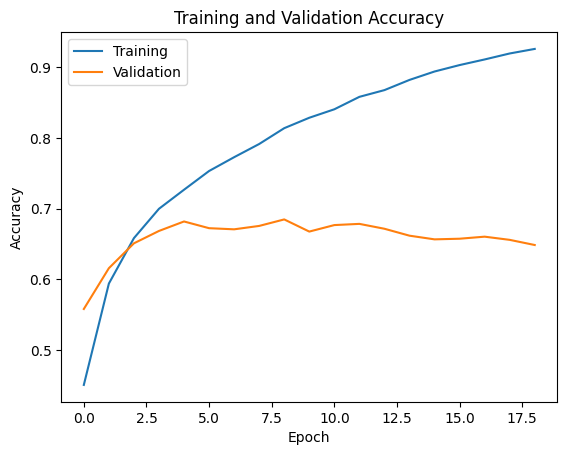

In [114]:
plt.plot(history3.history['accuracy'], label='Training')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

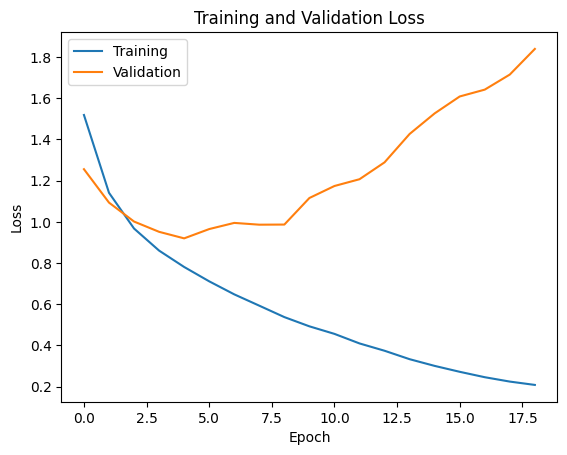

In [115]:
plt.plot(history3.history['loss'], label='Training')
plt.plot(history3.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

------------------------------
# 02: Transfer Learning


### Model Training

In [ ]:
pre_trained = ResNet50V2(include_top=False, pooling='avg', weights='imagenet')
for layer in pre_trained.layers:
    layer.trainable = False
pre_trained.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, None, None, 64) │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, None, None, 64) │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, None, None, 64) │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [117]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(pre_trained)
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2048)                │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,585,290 (89.97 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [118]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [119]:
history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.2550 - loss: 2.1254 - val_accuracy: 0.3416 - val_loss: 1.9331
Epoch 2/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3661 - loss: 1.8699 - val_accuracy: 0.3622 - val_loss: 1.8744
Epoch 3/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3866 - loss: 1.7999 - val_accuracy: 0.3693 - val_loss: 1.8476
Epoch 4/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3986 - loss: 1.7591 - val_accuracy: 0.3732 - val_loss: 1.8328
Epoch 5/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4062 - loss: 1.7308 - val_accuracy: 0.3772 - val_loss: 1.8240
Epoch 6/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4142 - loss: 1.7095 - val_accuracy: 0.3795 - val_loss: 1.8188
Epoch 7/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4180 - loss: 1.6926 - val_accuracy: 0.3808 - val_loss: 1.8159
Epoch 8/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4219 - loss: 1.678

### Model Evaluation

In [120]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4010 - loss: 1.7886
Loss: 1.7994160652160645
Accuracy: 0.38769999146461487


### Result Visualization

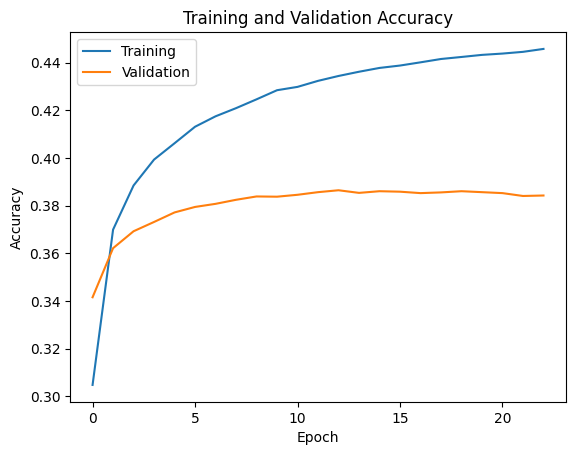

In [121]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

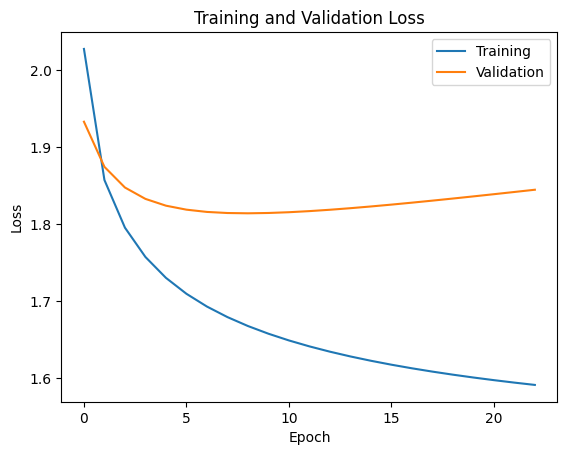

In [122]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

---